# Netflix Data: Cleaning, Analysis and Visualization

# About dataset

Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents. This dataset is a cleaned version of the original version which can be found here. The data consist of contents added to Netflix from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021. This dataset will be cleaned with pithon and visualized. The purpose of this dataset is to test my data cleaning and visualization skills.

# Import Required Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load Dataset

In [3]:
data=pd.read_csv('netflix1 - netflix1.csv')
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


# Data Cleaning

In [4]:
# get top 5 rows from data 
data.head()        
    

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
# get bottom 5 rows from data
data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [6]:
# get no.of rows and columns
data.shape

(8790, 10)

In [7]:
# get info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
# get datatypes of data
data.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [9]:
# covert date_added to date format 
data['date_added'] = pd.to_datetime(data['date_added'])
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [10]:
# dealing with null values
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [12]:
# There is no null values and duplicates values are present in the dataset.
data.duplicated().sum()

0

In [13]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


# Exploratory Data Analysis

In [14]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

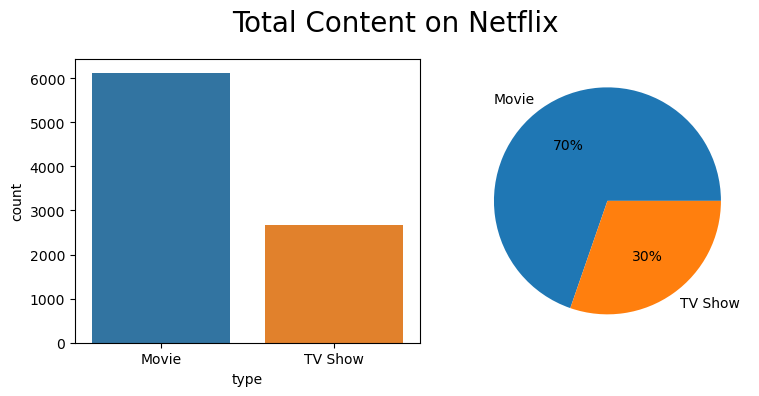

In [15]:
freq = data['type'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(x='type', data=data, ax=axes[0])
axes[1].pie(freq, labels=freq.index, autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.tight_layout()
plt.show()

In [18]:
# rating count on netflix 
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [17]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


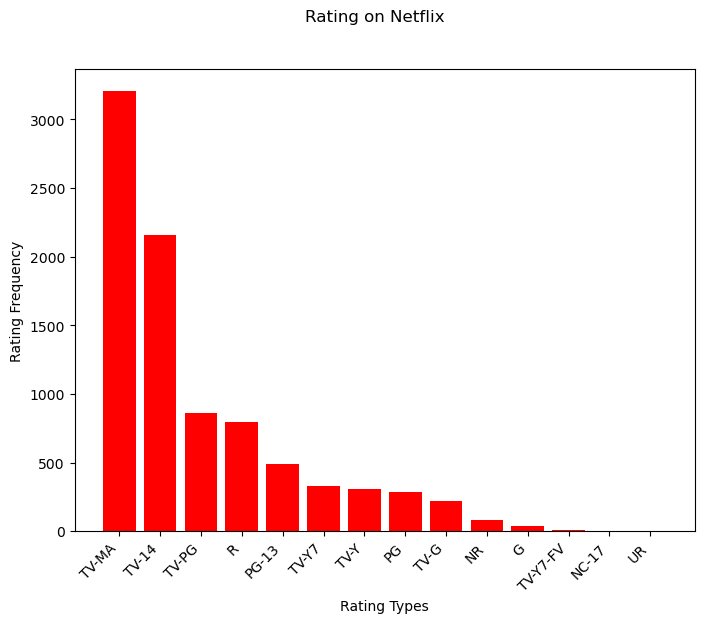

In [19]:
# rating count on Netflix using bar 
plt.figure ( figsize = (8,6))
plt.bar(ratings['rating']  , ratings['count'],color='r')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix',)
plt.show()

Text(0.5, 0.98, 'Rating on Netflix')

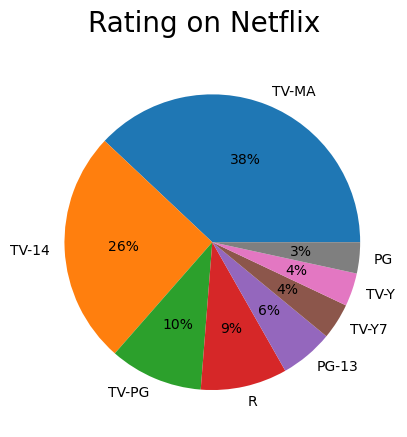

In [20]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

In [21]:
 #based on country 
data['country'].value_counts()    

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [22]:
top_country = data['country'].value_counts().reset_index().sort_values (by ='count', ascending = False)[:10]
top_country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


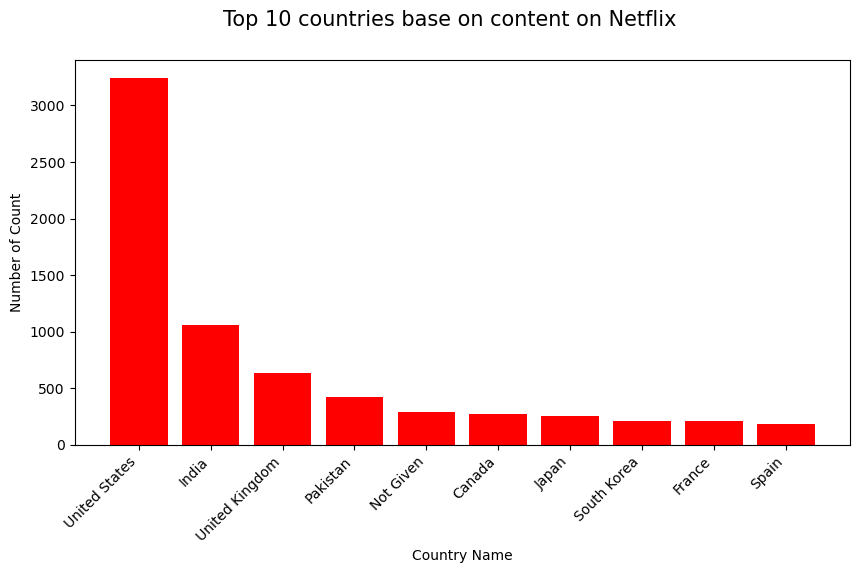

In [23]:
# top 10 countries base on content on netflix
plt.figure ( figsize = (10,5))
plt.bar(top_country['country'] , top_country['count'],color= 'r')
plt.xticks(rotation = 45 , ha ='right')
plt.suptitle('Top 10 countries base on content on Netflix' , fontsize = 15)
plt.xlabel ('Country Name')
plt.ylabel('Number of Count')
plt.show()

In [25]:
# content added over the time 
data['year_added']=data['date_added'].dt.year

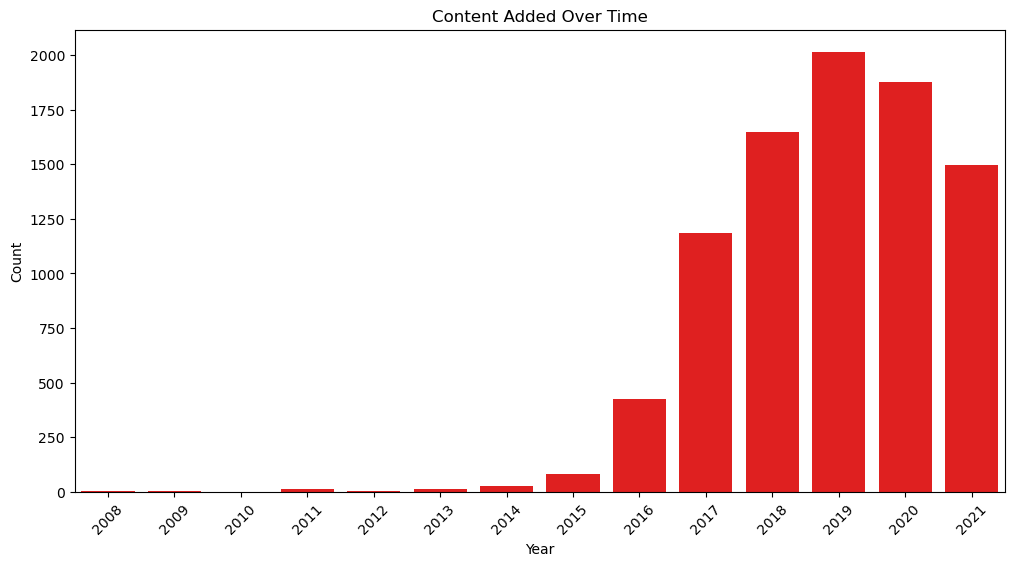

In [26]:
# Plot a graph:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, color='r')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

In [51]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,year,month,day,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,2021,9,25,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,2021,9,24,"[Crime TV Shows, International TV Shows, TV ..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,2021,9,24,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,2021,9,22,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,2021,9,24,"[Dramas, Independent Movies, International M..."


# Monthly and yearly releases of Movies and TV shows on Netflix

In [30]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_movie_release

month
1     545
2     382
3     528
4     549
5     439
6     492
7     565
8     518
9     518
10    545
11    498
12    547
Name: count, dtype: int64

In [31]:
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
monthly_series_release

month
1     192
2     180
3     213
4     214
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    265
Name: count, dtype: int64

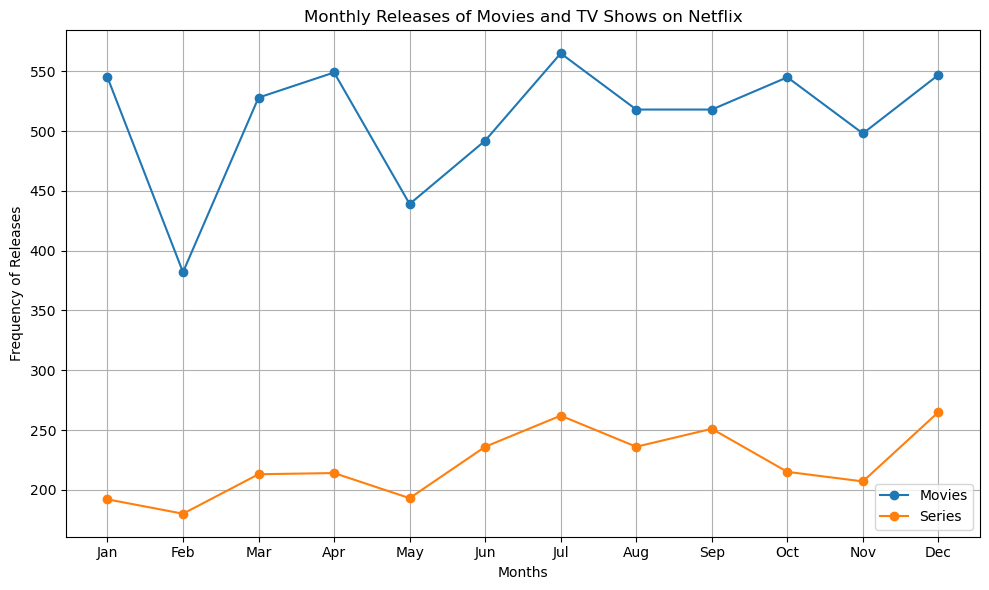

In [32]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series', marker='o')

# Customize the plot
plt.xlabel("Months")
plt.ylabel("Frequency of Releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Releases of Movies and TV Shows on Netflix")
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [33]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()

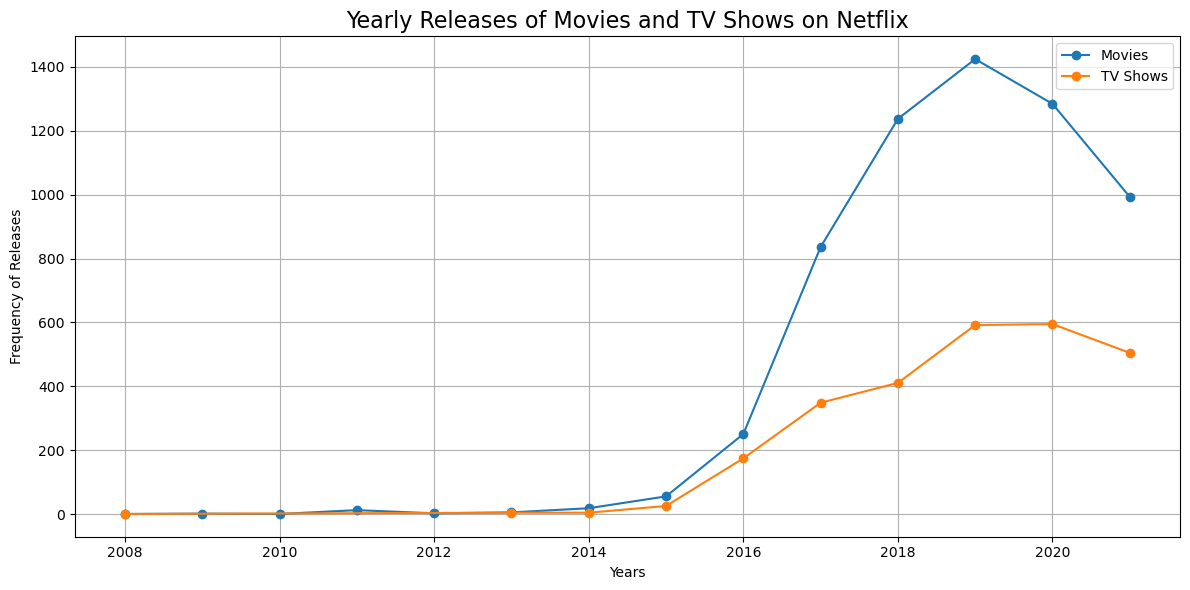

In [34]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies', marker='o')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows', marker='o')

# Customize the plot
plt.xlabel("Years")
plt.ylabel("Frequency of Releases")
plt.title("Yearly Releases of Movies and TV Shows on Netflix", fontsize=16)
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [42]:
# create new column genres
data['genres'] = data['listed_in'].apply(lambda x : x.split(','))

In [43]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,year,month,day,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,2021,9,25,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,2021,9,24,"[Crime TV Shows, International TV Shows, TV ..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,2021,9,24,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,2021,9,22,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,2021,9,24,"[Dramas, Independent Movies, International M..."


# Top 10 popular movies and TV Shows genres

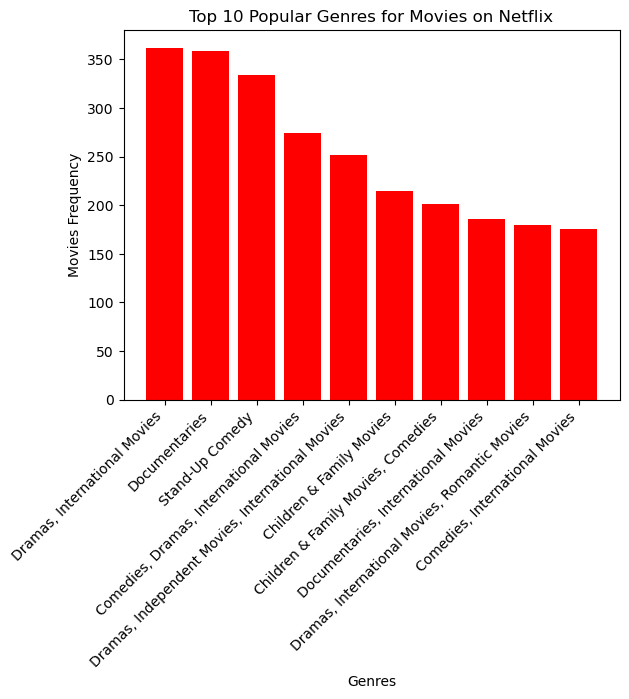

In [36]:
# Calculate the top 10 popular genres for Movies
popular_movie_genre = (
    data[data['type'] == 'Movie']
    .groupby('listed_in')
    .size()
    .sort_values(ascending=False)[:10]
)

# Calculate the top 10 popular genres for TV Shows
popular_series_genre = (
    data[data['type'] == 'TV Show']
    .groupby('listed_in')
    .size()
    .sort_values(ascending=False)[:10]
)

# Plot the top 10 genres for Movies
plt.bar(popular_movie_genre.index, popular_movie_genre.values, color='red')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.title("Top 10 Popular Genres for Movies on Netflix")
plt.show()

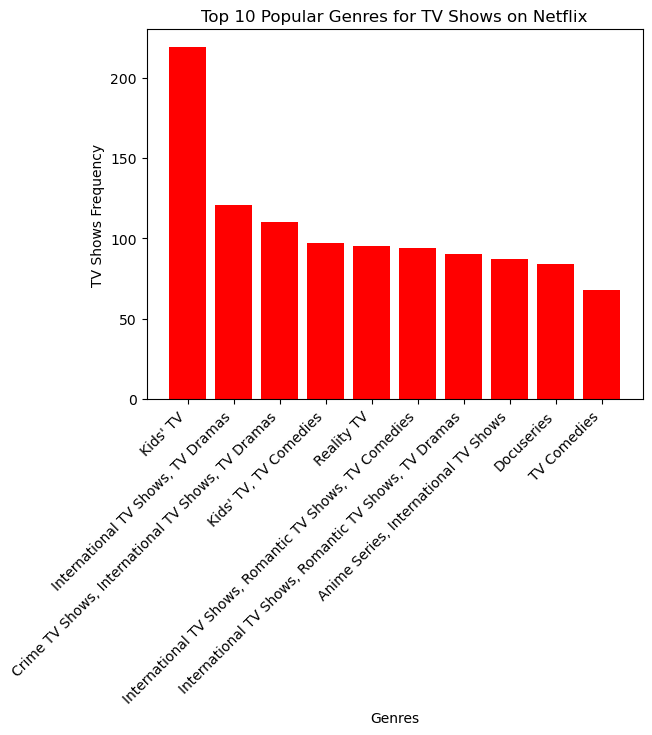

In [37]:
# Plot the top 10 genres for TV Shows
plt.bar(popular_series_genre.index, popular_series_genre.values, color='red')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.title("Top 10 Popular Genres for TV Shows on Netflix")
plt.show()

In [44]:
# Top 15 directors across Netflix with hoigh frequency of movies and Tv shows
top_directors = data['director'].value_counts().reset_index().sort_values(by = 'count', ascending = False)[1:16]
top_directors

,director,count
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
9,Youssef Chahine,12
10,Jay Chapman,12
8,Martin Scorsese,12


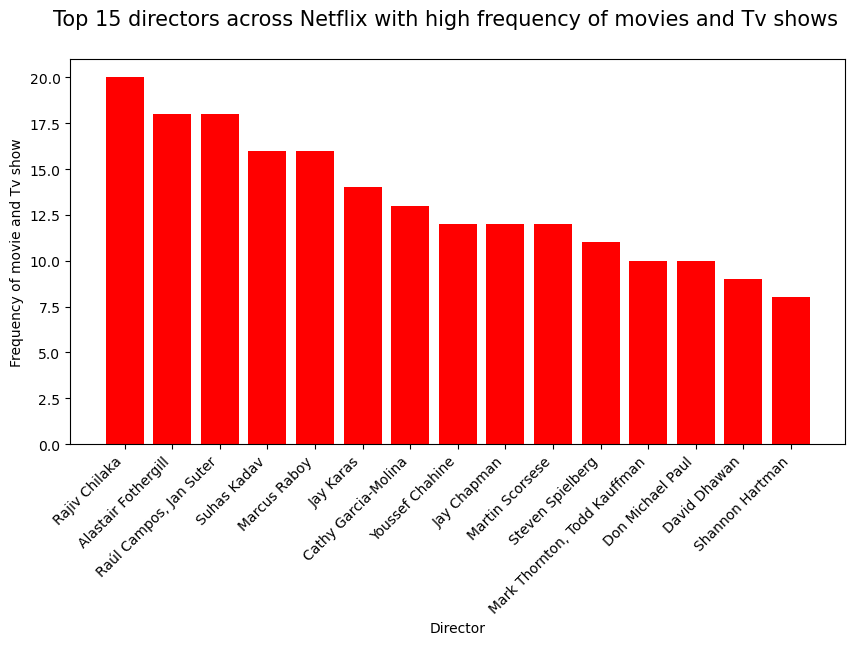

In [45]:
plt.figure(figsize = (10,5))
plt.bar(top_directors['director'] , top_directors['count'],color = 'r')
plt.xticks(rotation = 45, ha ='right')
plt.xlabel('Director')
plt.ylabel('Frequency of movie and Tv show')
plt.suptitle('Top 15 directors across Netflix with high frequency of movies and Tv shows', fontsize = 15)
plt.show()

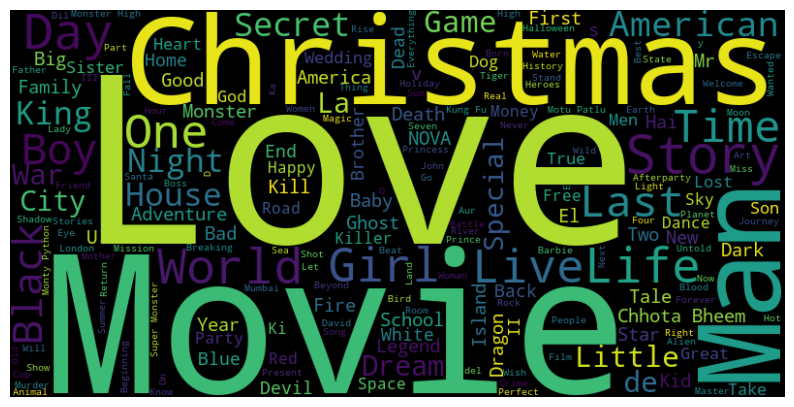

In [48]:
# Filter movie titles from the dataset
movie_titles = data.loc[data['type'] == 'Movie', 'title']

# Generate a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black'
).generate(' '.join(movie_titles))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Conclusion of Analysis
- Netflix has a higher volume of movies compared to TV shows.
- TV-MA has the highest content rating.
- The majority of content is produced by the US, followed by India.
- The platform predominantly features content aimed at mature audiences.
- 2019 stands out as the year with the highest volume of content releases, surpassing other years up to 2021.
- International movies and dramas are the most popular genres on Netflix.
- Movies are released more frequently than TV series each month.
- Netflix focused more on movie than TV shows over the years. 
- Rajiv Chilaka is the most popular directors across netflix. 
- Popular themes on Netflix include "Love", "Movie", "Christmas", indicating a focus on romance, holidays, and narratives.